# Explore here

In [1]:
# Load the dataset & find out what it is
### DON'T FORGET - YOU MAY NEED TO 1ST TYPE: pip install pandas | IN THE TERMINAL BELOW TO GET PANDAS TO WORK!!! ###

import pandas as pd
whole_data = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
whole_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
# Scan for duplicates & show them
duplicates = whole_data[whole_data.duplicated()]
duplicates
# ONE was found.

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [3]:
# Remove duplicate(s)
whole_data = whole_data.drop_duplicates().reset_index(drop = True)

In [4]:
# Scan for 'Null Values' & show them
whole_data.isnull().sum()
# None were found so we don't have to delete/remove anything

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Because parts of the dataframe is TEXT(i.e; categorical) & not VALUES(i.e; numerical) those must be converted to numerical through "factorizing"
# These fields are therefore: sex, smoker, region

whole_data["sex_n"] = pd.factorize(whole_data["sex"])[0]
whole_data["smoker_n"] = pd.factorize(whole_data["smoker"])[0]
whole_data["region_n"] = pd.factorize(whole_data["region"])[0]

In [6]:
whole_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n',
       'smoker_n', 'region_n'],
      dtype='object')

In [7]:
factorized_data = whole_data[['age', 'bmi', 'children', 'charges', 'sex_n',
        'smoker_n', 'region_n']].copy

In [8]:
# At this point what data needs to be eliminated to determine best results for exercise? In THIS case, it's 
# to calculate an insurance premium/cost of customers, based on their physiological data
# We choose to eliminate the column "REGION" as this is irrelevant!

#whole_data.drop(["region", "region_n"], axis = 1, inplace = True)

### IMPORTANT - whole_data when typed below and executed will not work now as original data has now been changed!!! ###
### The entire code must now be ran/executed again with THIS cell omitted/# commented out so that the dataframe misses "region_n" deliberately!



In [9]:
whole_data.head()

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [10]:
# X = Our test data variables, being: AGE, SMOKER_N ('_n' because this is the one that's been factorized/numerically sorted) & SEX
# y = our target, being: CHARGES (meaning price - Is what we're hoping to determine, from the prior variables: AGE, SMOKER_N, SEX)

X = whole_data[["age", "smoker_n", "sex_n", "bmi, "children"]]
y = whole_data[["charges"]]

SyntaxError: unterminated string literal (detected at line 4) (2487723320.py, line 4)

In [ ]:
# Get the system trained on the relationship "CHARGES" has shared with each variable: AGE, SMOKER_N, SEX from our existing dataset, being; WHOLE_DATA
# By splitting this data 80% / 20% (indicated by "0.2" below) we test if the acknowledgement of the above step is good enough to generate the missing 20%
### DON'T FORGET - YOU MAY NEED TO 1ST TYPE: pip install scikit-learn | IN THE TERMINAL BELOW TO GET SKLEARN TO WORK!!! ###

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
# ALTHOUGH NOT DEPLOYED HERE # CHI2 = a number that tells us if two categorical variables (e.g; eye color & gender) are related or not calculated by comparing the actual counts
#of observations in different categories to what we'd expect if there was no relationship between the variables. If the chi-squared value is big, likely there "IS" relationship.

#BELOW ARE HYPERPAREMETERS BEING USED

# SELECT-K-BEST = K (KEEP) set to K=2, means selecting & keeping the 2 best features reducing the model complexity & improving its performance, focussed on most relevant data.

# F_REGRESSION = specifically selects features based on their correlation with the target variable in a regression setting.

# SO - Take the 5 best features from the dataset

from sklearn.feature_selection import f_regression, SelectKBest

selection_model = SelectKBest(f_regression, k = 2)
selection_model.fit_transform(X_train, y_train)
ix = selection_model.get_support()


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_train.head()
y_train.head()

,charges
1113,2396.09590
967,3279.86855
598,33471.97189
170,13405.39030
275,9715.84100


Index(['age', 'smoker_n', 'sex_n'], dtype='object')
Index(['charges'], dtype='object')
Index(['age', 'smoker_n', 'sex_n'], dtype='object')
Index(['charges'], dtype='object')


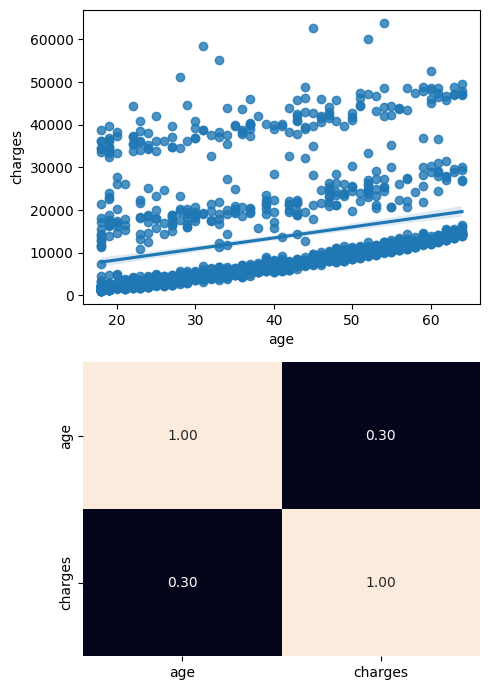

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Concatenate the features and targets for the training and testing data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Verify that 'age' and 'charges' are not duplicated in X_train/y_train and X_test/y_test
print(X_train.columns)
print(y_train.columns)
print(X_test.columns)
print(y_test.columns)

# Concatenate training and testing data vertically, ensuring no duplicate columns
total_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Ensure 'age' and 'charges' columns are unique and contain no NaN values
total_data = total_data[['age', 'charges']].dropna()

# Now the plotting should work without issues
fig, axis = plt.subplots(2, 1, figsize=(5, 7))

# Scatter plot with regression line
sns.regplot(ax=axis[0], data=total_data, x='age', y='charges')

# Heatmap showing the correlation between 'age' and 'charges'
sns.heatmap(total_data[['age', 'charges']].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

plt.tight_layout()
plt.show()

In [ ]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): 20871.6378161105
Coefficients (b): [   267.9957804  -22993.92899729     86.3430602 ]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([11095.84511841,  5649.58645029, 11545.493619  , 29265.85006858,
        6271.92107129, 11095.84511841, 27035.54076521,  3773.61598753,
        9401.52737583, 11095.84511841, 14225.45142295, 34893.76145689,
       29533.84584897, 14225.45142295,  7257.56113267, 10023.86199683,
        3323.96748694, 30605.82897056,  4931.94216931,  5649.58645029,
        3237.62442673, 30605.82897056, 11009.50205821, 31409.81631174,
       29715.49856917,  3505.62020713, 32127.46059273, 37037.72770005,
       11009.50205821, 10827.84933802,  6185.57801109, 11363.84089881,
        2787.97592615, 13775.80292237, 35343.40995747, 11545.493619  ,
        2969.62864634,  5917.58223069, 35161.75723728, 10205.51471702,
        3773.61598753, 32395.45637312, 32481.79943333, 11631.8366792 ,
       10205.51471702,  5381.5906699 ,  2701.63286594,  9401.52737583,
        5381.5906699 ,  8415.88731445,  5381.5906699 ,  8415.88731445,
       32395.45637312,  3323.96748694,  9219.87465564,  9755.86621643,
      

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 41663784.234397806
Coefficient of determination: 0.7732657996795188
